# Test
A testing file where we can show how to use each of our components and leverage the components of others.

## Bert Embeddings
Here is an example showing how to embed the course sentences collected by Kalen.

In [79]:
from embeddings.bert import BertSentenceEmbedder
import pandas as pd
import numpy as np
from nltk.metrics import edit_distance
from helper import load_data

In [96]:
sents, labels = load_data(num_majors=5)
embedder = BertSentenceEmbedder(device="mps", padding_length=1000)
embs = embedder.transform(sents)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<AxesSubplot: xlabel='x', ylabel='y'>

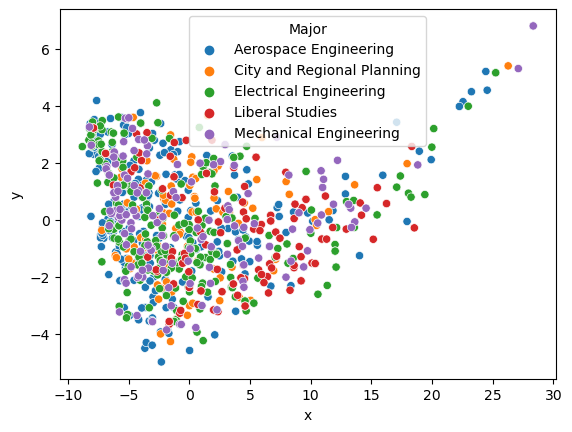

In [101]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
dims = pca.fit_transform(embs)

df = pd.DataFrame({"x": dims[:,0], "y": dims[:,1], "Major": labels})
sns.scatterplot(df, x="x", y="y", hue="Major")

In [65]:


courses = pd.read_csv("course_sentences.csv")
program_descs = pd.read_csv("program_descriptions.csv")
# program_descs["program"] = program_descs["Program"].apply(str.strip).replace({"Comparative Ethics Studies": "Comparative Ethnic Studies", "Statistic": "Statistics"})
# program_descs = program_descs.drop(["Program"],axis=1)
# program_descs.columns = ["description", "program"]
# program_descs = program_descs.drop_duplicates(subset=["description"])


In [78]:
t = courses.groupby("program").count().sort_values(by=["course"], ascending=False).reset_index()
t[t["program"] == "Computer Engineering"]

,program,sentence,course
42,Computer Engineering,21,21


In [45]:
almost_matches = []
dist = 4
def preprocess(x:str):
    return x.strip()
for n1 in courses["program"].unique():
    for n2 in map(preprocess, program_descs["program"].unique()):
        if n1 != n2 and edit_distance(n1,n2) < dist:
            almost_matches.append((n1,n2))

almost_matches

[]

In [56]:
len(courses)+ len(program_descs)

3002

In [52]:
program_descs.to_csv("program_descriptions.csv", index=False)

In [41]:
# Note this will take about 2 minutes on a CPU. Highly recommend you utilize your GPU
device = "cpu"
# The associated warning is not a problem for us. See https://huggingface.co/bert-base-uncased/discussions/4
embedder = BertSentenceEmbedder(device=device, padding_length=1000)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [42]:
embeddings = embedder.transform(list(df["sentence"]))

RuntimeError: The expanded size of the tensor (1000) must match the existing size (512) at non-singleton dimension 1.  Target sizes: [2623, 1000].  Tensor sizes: [1, 512]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
labels = df["program"]
classifier = KNeighborsClassifier()
classifier.fit(embeddings, labels)

KNeighborsClassifier()

In [ ]:
num_suggestions = 4
prompt = "I want to travel and meet people with different cultures"
embedding = embedder.transform([prompt])
probs = classifier.predict_proba(embedding)[0]
idx = np.argsort(-probs)
label_map = np.array(sorted(set(labels)))
label_map[idx][:num_suggestions]

array(['Materials Engineering', 'Aerospace Engineering',
       'Liberal Studies', 'Recreation, Parks, and Tourism Administration'],
      dtype='<U45')

In [ ]:
classifier.predict(embedding)[0]

'Anthropology and Geography'

In [ ]:
len(set(label_map)), len(label_map)

(76, 2623)

In [54]:
df["program"].iloc[5]

'Aerospace Engineering'